In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import seaborn as sns
import random
import requests as req
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# Create an empty DataFrame to store city information
cities = []
count = 0

# Make a random list of lat and lon coordinates
while count < 500:
    lat = random.randint(-90,90)
    lon = random.randint(-180,180)
    
    # If the nerest city is duplicate, it does not append to "cities" DataFrame
    if citipy.nearest_city(lat, lon) not in cities:
        cities.append(citipy.nearest_city(lat, lon))
        count = count + 1

# Print out list of cities and country code
len(cities)

500

In [6]:
# Create an empty DataFrame to store JSON response
city_data = []

# Save config information
url = 'http://api.openweathermap.org/data/2.5/weather'
params = {'appid': weather_api_key,
          'q': '',
          'units': 'imperial'}

# Loop through each city and use the city name to get back the weather doata using the Weather API
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.
counter=0
for index, city in enumerate(cities):
    try:
        counter=counter + 1
        params['q'] = city.city_name + ',' + city.country_code
        print(f"Weather Data #{counter}  |  {city.city_name}")
        print(f"Requested URL: {url + '?units=' + params['units'] + '&APPID=' + params['appid'] + '&q=' + city.city_name.replace(' ', '%20') + ',' + city.country_code}")
        response = req.get(url, params=params).json()
        city_data.append(response)
    except:
        print(f"weather data for {city.city_name} is not available")
# Print JSON structure
print(json.dumps(response, indent=4, sort_keys=True))

Weather Data #1  |  lumphat
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=lumphat,kh
Weather Data #2  |  cape town
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=cape%20town,za
Weather Data #3  |  avarua
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=avarua,ck
Weather Data #4  |  severo-kurilsk
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=severo-kurilsk,ru
Weather Data #5  |  roma
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=roma,au
Weather Data #6  |  tigil
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=tigil,ru
Weather Data #7  |  deputatskiy
Requested URL: htt

Weather Data #54  |  upernavik
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=upernavik,gl
Weather Data #55  |  olafsvik
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=olafsvik,is
Weather Data #56  |  homer
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=homer,us
Weather Data #57  |  vaini
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=vaini,to
Weather Data #58  |  saint george
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=saint%20george,us
Weather Data #59  |  rabo de peixe
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=rabo%20de%20peixe,pt
Weather Data #60  |  makak

Weather Data #106  |  uribia
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=uribia,co
Weather Data #107  |  cidreira
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=cidreira,br
Weather Data #108  |  puerto ayora
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=puerto%20ayora,ec
Weather Data #109  |  namibe
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=namibe,ao
Weather Data #110  |  barentsburg
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=barentsburg,sj
Weather Data #111  |  verkhoyansk
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=verkhoyansk,ru
Weather Data #112  |

Weather Data #157  |  shingu
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=shingu,jp
Weather Data #158  |  panama city
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=panama%20city,us
Weather Data #159  |  tlazazalca
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=tlazazalca,mx
Weather Data #160  |  ojinaga
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=ojinaga,mx
Weather Data #161  |  toliary
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=toliary,mg
Weather Data #162  |  vostok
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=vostok,ru
Weather Data #163  |  qasigianngui

Weather Data #208  |  sayat
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=sayat,tm
Weather Data #209  |  agadir
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=agadir,ma
Weather Data #210  |  general roca
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=general%20roca,ar
Weather Data #211  |  inhambane
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=inhambane,mz
Weather Data #212  |  saint-philippe
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=saint-philippe,re
Weather Data #213  |  honningsvag
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=honningsvag,no
Weather Data #

Weather Data #259  |  maniitsoq
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=maniitsoq,gl
Weather Data #260  |  victor harbor
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=victor%20harbor,au
Weather Data #261  |  zhicheng
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=zhicheng,cn
Weather Data #262  |  lindi
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=lindi,tz
Weather Data #263  |  hay river
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=hay%20river,ca
Weather Data #264  |  esperance
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=esperance,au
Weather Data #265  |

Weather Data #310  |  baghdad
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=baghdad,iq
Weather Data #311  |  las tunas
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=las%20tunas,cu
Weather Data #312  |  palmer
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=palmer,us
Weather Data #313  |  lata
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=lata,sb
Weather Data #314  |  ayan
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=ayan,ru
Weather Data #315  |  catuday
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=catuday,ph
Weather Data #316  |  amapa
Requested URL: http://api.

Weather Data #362  |  vestmannaeyjar
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=vestmannaeyjar,is
Weather Data #363  |  langsa
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=langsa,id
Weather Data #364  |  porto novo
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=porto%20novo,cv
Weather Data #365  |  beringovskiy
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=beringovskiy,ru
Weather Data #366  |  la palma
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=la%20palma,pa
Weather Data #367  |  saleaula
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=saleaula,ws
Weather Da

Weather Data #413  |  caravelas
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=caravelas,br
Weather Data #414  |  pizarro
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=pizarro,co
Weather Data #415  |  kamyshin
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=kamyshin,ru
Weather Data #416  |  alice springs
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=alice%20springs,au
Weather Data #417  |  port macquarie
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=port%20macquarie,au
Weather Data #418  |  matara
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=matara,lk
Weather Data

Weather Data #464  |  cravo norte
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=cravo%20norte,co
Weather Data #465  |  bayir
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=bayir,jo
Weather Data #466  |  tumannyy
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=tumannyy,ru
Weather Data #467  |  zhanatas
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=zhanatas,kz
Weather Data #468  |  nouadhibou
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=nouadhibou,mr
Weather Data #469  |  flagstaff
Requested URL: http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=c39e25ef3216255e86f06c9023c521b0&q=flagstaff,us
Weather Data #470  |  herv

In [7]:
city= []
clouds= []
country= []
date= []
humidity= []
lat= []
lng= []
temp= []
wind= []
for data in city_data:
    if data['cod']==200:
        city.append(data['name'])
        clouds.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        temp.append(data['main']['temp_max'])
        wind.append(data['wind']['speed'])

weather_dict = {"City": city,
                "Cloudiness": clouds,
                "Country": country,
                "Humidity": humidity,
                "Lat": lat,
                "Lng": lng,
                "Temperature (°F)": temp,
                "Wind Speed": wind}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df=weather_data_df[["City","Country","Lat","Lng","Temperature (°F)","Humidity","Wind Speed","Cloudiness"]]


weather_data_df.head()

,City,Country,Lat,Lng,Temperature (°F),Humidity,Wind Speed,Cloudiness
0,Lumphat,KH,13.4878,106.9816,80.73,72,6.15,97
1,Cape Town,ZA,-33.9258,18.4232,61.21,81,10.36,75
2,Avarua,CK,-21.2078,-159.7750,78.85,69,14.97,20
3,Severo-Kuril'sk,RU,50.6789,156.1250,39.16,70,3.65,42
4,Roma,AU,-26.5833,148.7833,79.70,36,8.34,90


In [27]:
#Export to csv
output_data_file = "output_data/cities.csv"
weather_data_df.to_csv(r"C:\Users\tinuo\OneDrive\Desktop\cities.csv", index=False)


Temperature vs latitude scatterplot shows the relationship between the temperature and latitude of each city and
it seems to indicate a negative relationship


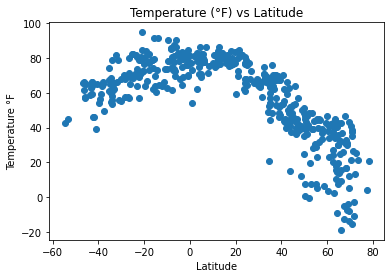

In [17]:
#Temperature vs Latitude
plt.scatter(weather_data_df["Lat"],weather_data_df["Temperature (°F)"],marker ="o")
plt.title("Temperature (°F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature °F")

plt.show()


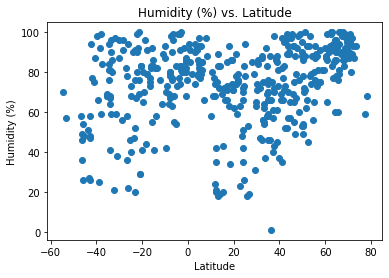

In [18]:
#Humidity Vs. Latitude
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"],marker ="o")
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

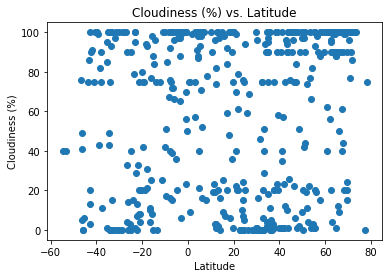

In [19]:
#Cloudiness Vs. Latitude 
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"],marker ="o")
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

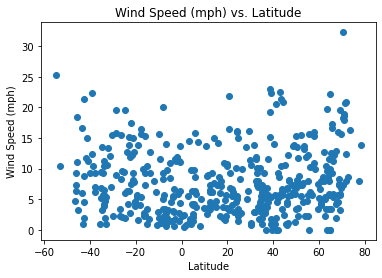

In [20]:
#Wind Speed Vs. Latitude
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"],marker ="o")
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()